In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


distribution plot içeriye bir tane sütun gönderiyorum

scatter plor--> bunun hem x ine hem y sine hem numerik hem kategorik değişken verebilir miyiz?

kategorik plotta direkt kategorilerin sayılarını alıyoruz.
kategorik plotta eksenlerimizden biri kategorik diğeri numerik olacak. 
kategorilerin count'u numerik ekseni oluşturacak.

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


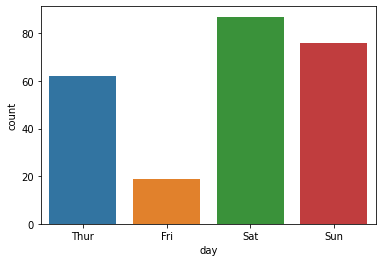

In [35]:
# biz burda countplota sadece x değeri gireceğiz. 

sns.countplot(x = "day", data = tips);

# haftanın 4 günü için kayıt var elimizde. haftanın bu günlerine göre countplot'u yaptırdık.

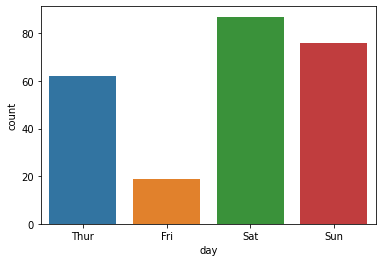

In [38]:
# bunların üzerin label ları yazdıralım.

fig, ax_tip = plt.subplots()

sns.countplot(x = "day", data=tips, ax = ax_tip);

# countplot, içinde bana ax'ın ne olduğunu göster diyor. 
# ax=ax_tip yaparak matplotlib ile seaborn u birleştiriyorum.

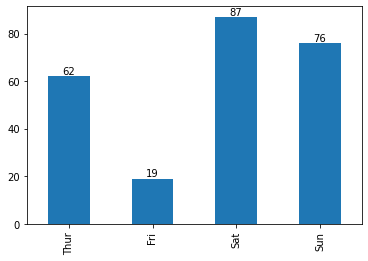

In [34]:
fig, ax = plt.subplots()
ax = tips.day.value_counts().sort_index().plot.bar()
# sns.countplot(x="day", data = tips, ax = ax_tip );
for index, value in enumerate(tips.day.value_counts().sort_index().values):
    plt.text(index,value,str(value), ha = 'center', va= "bottom")

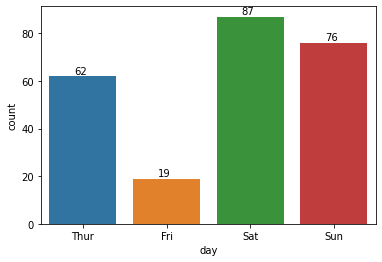

In [40]:
fig, ax_tip = plt.subplots()
ax_tip = sns.countplot(x="day", data = tips);
# sns.countplot(x="day", data = tips, ax = ax_tip );
for p in ax_tip.patches:
    ax_tip.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));
    

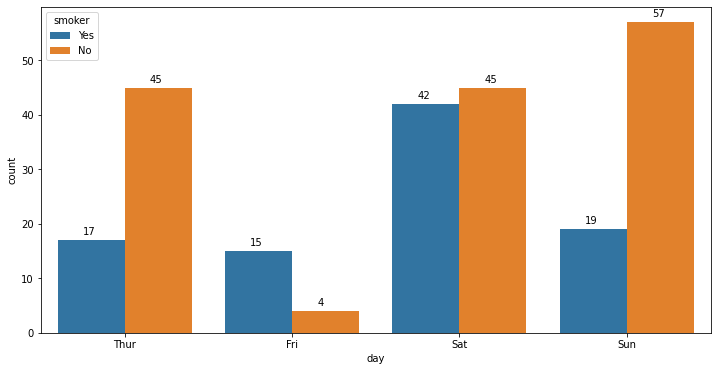

In [14]:
fig, ax_tip = plt.subplots(figsize=(12,6))
ax_tip = sns.countplot(x="day", data = tips, hue="smoker");
# sns.countplot(x="day", data = tips, ax = ax_tip );
for p in ax_tip.patches:
    ax_tip.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1));

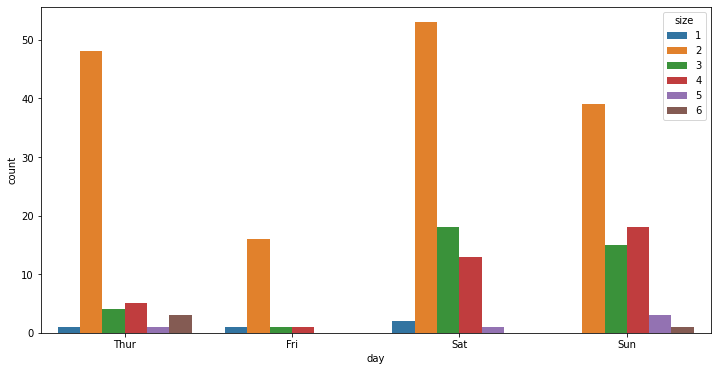

In [41]:
# HUE ekleyelim.

fig, ax_tip = plt.subplots(figsize=(12,6))

ax_tip = sns.countplot(x="day", data = tips, hue = "size");

# sns.countplot(x="day", data = tips, ax = ax_tip );

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));
    
    
# hue = size girdim. size deyince kaç kişilik menu olduğunu anlıyorum. 
# dolayısıyla menülere göre günlük sayıları plotlattım.

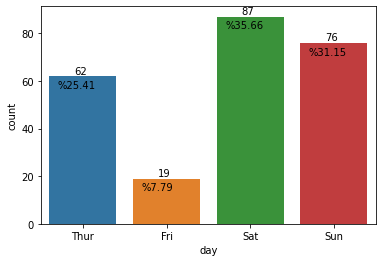

In [28]:
fig, ax_tip = plt.subplots()
ax_tip = sns.countplot(x="day", data = tips);
# sns.countplot(x="day", data = tips, ax = ax_tip );
for p in ax_tip.patches:
    ax_tip.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));
    ax_tip.annotate("%"+str(round((p.get_height()/tips.day.count())*100,2)), (p.get_x()+0.1, p.get_height()-5));

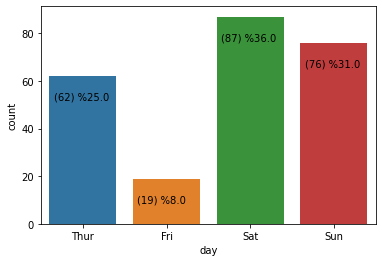

In [48]:
fig, ax_tip = plt.subplots()
ax_tip = sns.countplot(x="day", data = tips);
# sns.countplot(x="day", data = tips, ax = ax_tip );
for p in ax_tip.patches:
    ax_tip.annotate('(' +
                    str(p.get_height()) +
                    ') ' +
                     '%' +
                    str(round((p.get_height())/tips.day.count(), 2)*100), (p.get_x()+0.05, p.get_height()-10));

<AxesSubplot:xlabel='sex', ylabel='tip'>

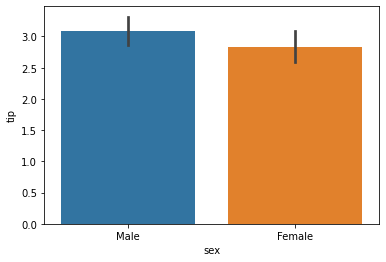

In [42]:
sns.barplot("sex", "tip", data = tips)

<AxesSubplot:xlabel='sex', ylabel='tip'>

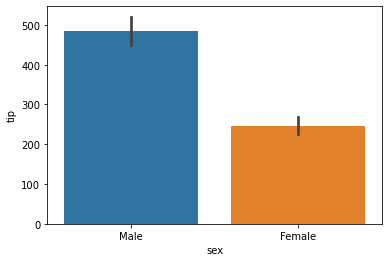

In [43]:
sns.barplot("sex", "tip", data = tips, estimator = np.sum)

# estimator'a sum aggregate fonksiyonunu girerek tip'lerin toplamını aldım.
# erkeklerin ve kadınların toplam bıraktığı bahşişi görebiliyorum

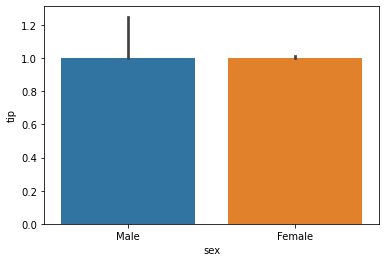

In [44]:
sns.barplot("sex", "tip", data = tips, estimator = np.min);

 # verilen minimun bahşişleri gördüm.

<AxesSubplot:xlabel='sex', ylabel='tip'>

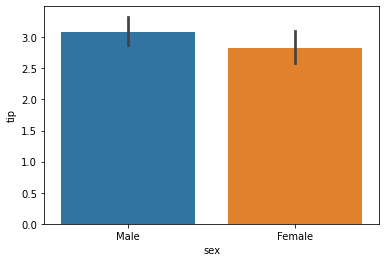

In [45]:
sns.barplot("sex", "tip", data = tips, estimator = np.mean)

<AxesSubplot:xlabel='sex', ylabel='tip'>

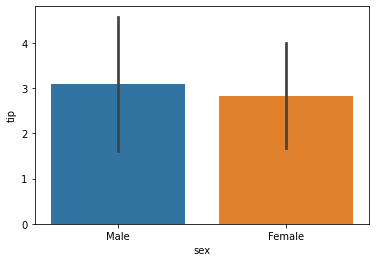

In [46]:
sns.barplot("sex", "tip", data = tips, estimator = np.mean, ci="sd")

<AxesSubplot:xlabel='sex', ylabel='tip'>

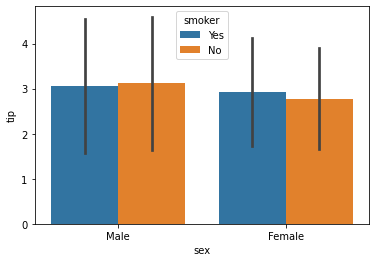

In [47]:
sns.barplot("sex", "tip", data = tips, estimator = np.mean, ci="sd", hue = "smoker")

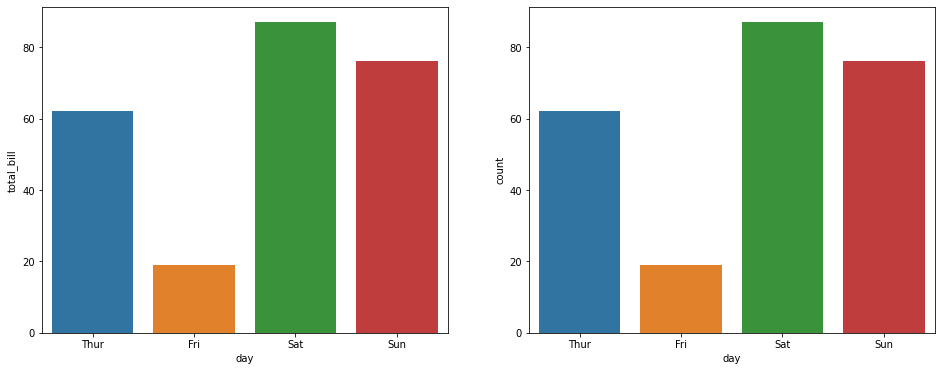

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

ax[0] = sns.barplot(data = tips, x = "day", y = "total_bill", ax = ax[0], estimator = np.count_nonzero)
ax[1] = sns.countplot(data = tips, x = "day", ax = ax[1])
plt.show()

## Boxplot

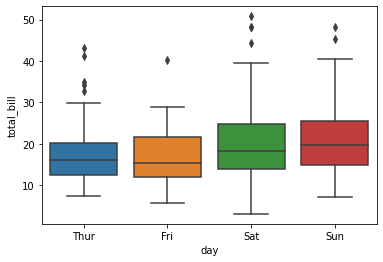

In [68]:
sns.boxplot(x = "day", y = "total_bill", data = tips);

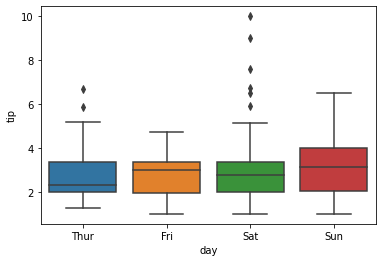

In [69]:
sns.boxplot(x = "day", y = "tip", data = tips);

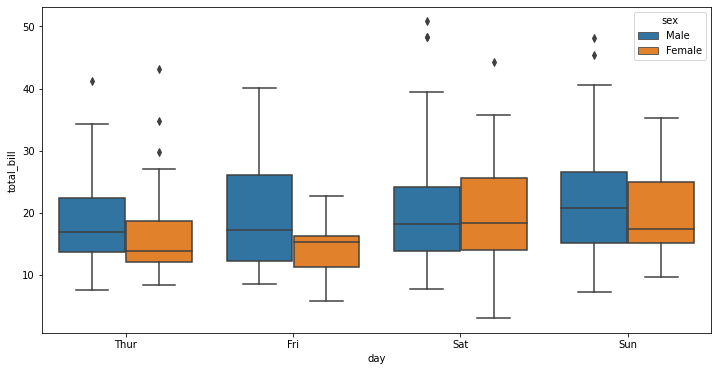

In [71]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "day", y = "total_bill", data= tips, hue = "sex")
plt.show()

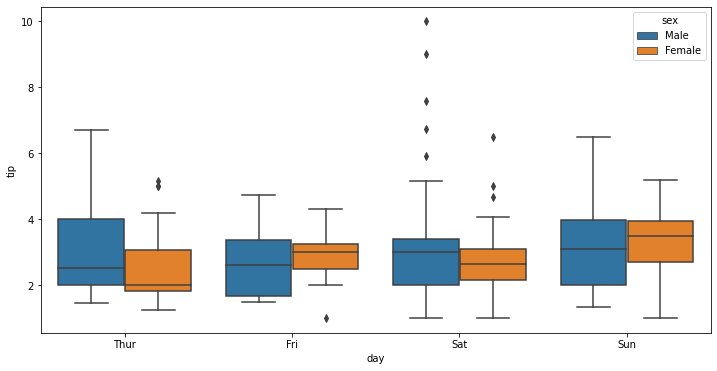

In [72]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "day", y = "tip", data= tips, hue = "sex")
plt.show()

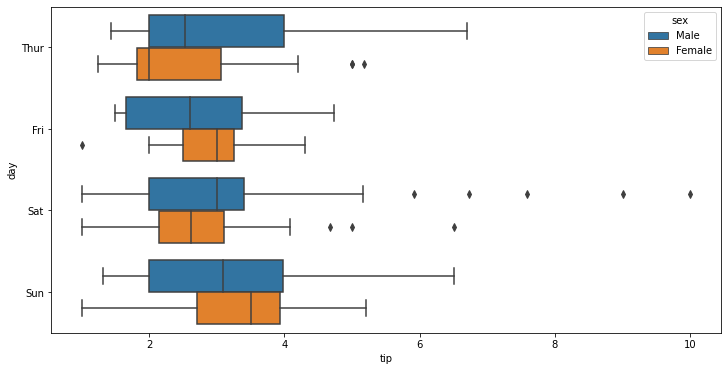

In [73]:
# Grafiği x ve y nin yerlerini değiştirerek yan horizontal yapalım
plt.figure(figsize = (12,6))
sns.boxplot(y = "day", x = "tip", data= tips, hue = "sex")
plt.show()

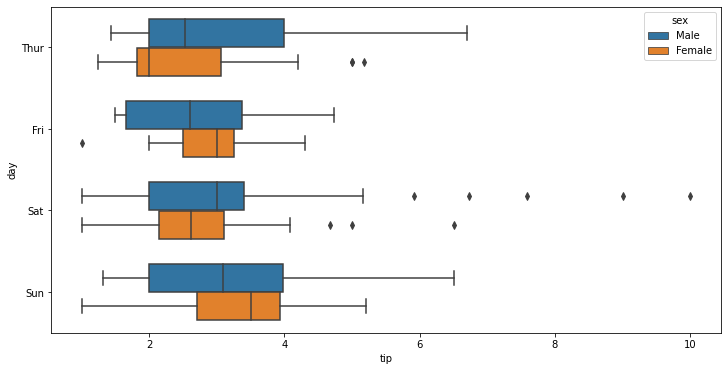

In [74]:
plt.figure(figsize = (12,6))
sns.boxplot(y = "day", x = "tip", data= tips, hue = "sex", width = 0.7)
plt.show()

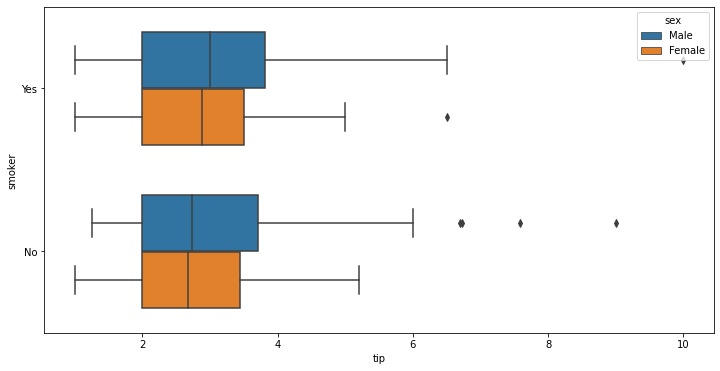

In [75]:
plt.figure(figsize = (12,6))
sns.boxplot(y = "smoker", x = "tip", data= tips, hue = "sex", width = 0.7)
plt.show()

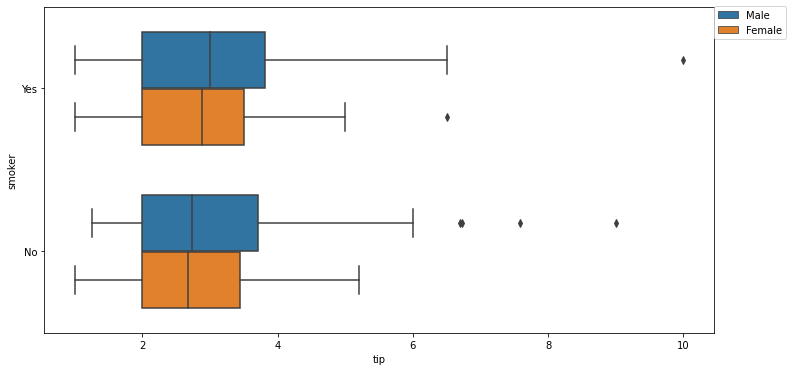

In [79]:
plt.figure(figsize = (12,6))
sns.boxplot(y = "smoker", x = "tip", data= tips, hue = "sex", width = 0.7)
plt.legend(loc=(1,.9))
plt.show()

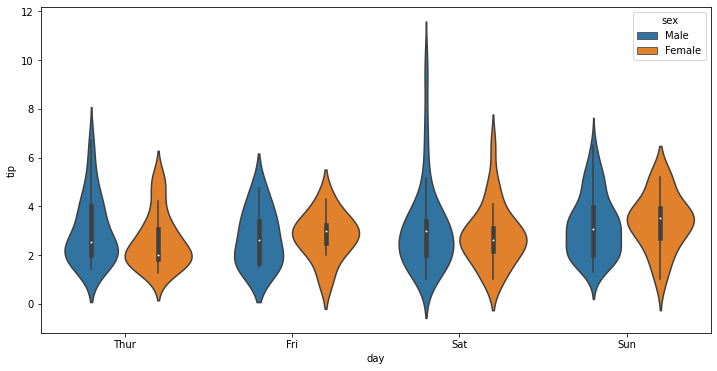

In [84]:
plt.figure(figsize=(12,6))
sns.violinplot(x="day", y="tip",data=tips, hue="sex");

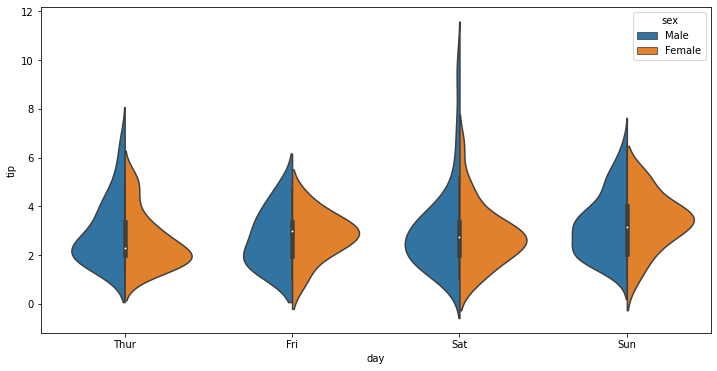

In [82]:
plt.figure(figsize=(12,6))
sns.violinplot(x="day", y="tip",data=tips, hue="sex",split=True);

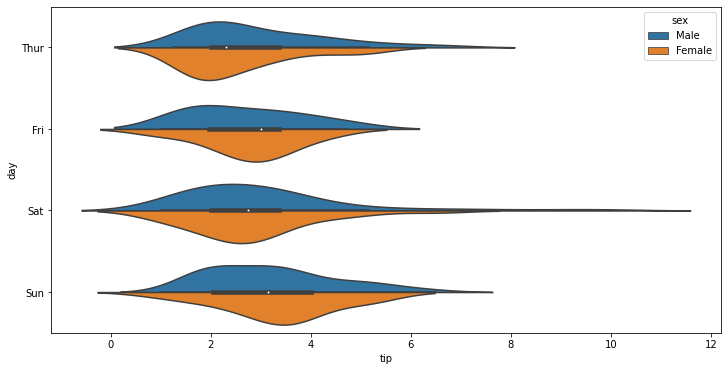

In [85]:
plt.figure(figsize=(12,6))
sns.violinplot(y="day", x="tip",data=tips, hue="sex",split=True)
plt.show()

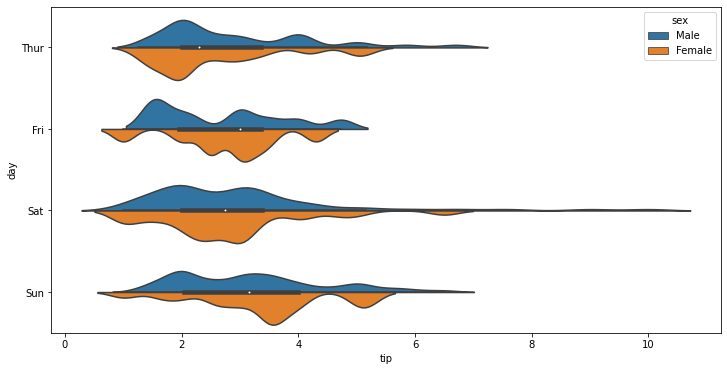

In [87]:
plt.figure(figsize=(12,6))
sns.violinplot(y="day", x="tip",data=tips, hue="sex",split=True, bw = 0.2);

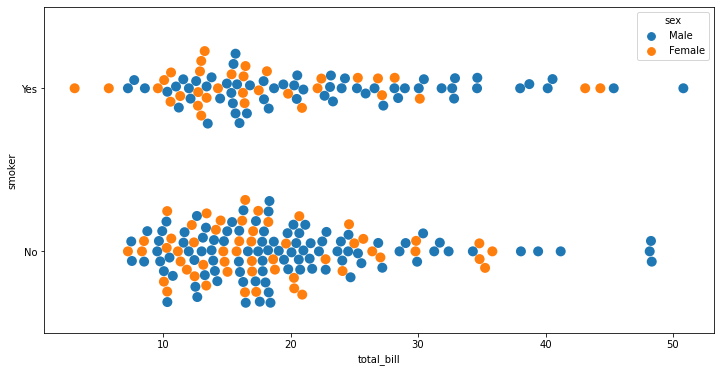

In [93]:
plt.figure(figsize=(12,6))
sns.swarmplot(x = "total_bill", data = tips, size = 10, y = "smoker", hue = "sex")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(x = "total_bill", data = tips, size = 10, y = "smoker", hue = "sex")
plt.show()

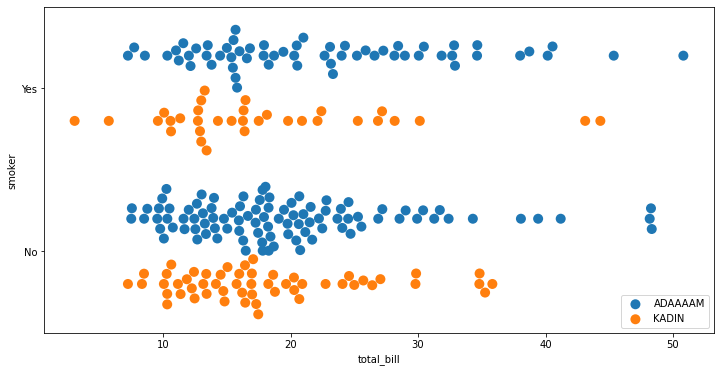

In [100]:
plt.figure(figsize=(12,6))
sns.swarmplot(x = "total_bill", data = tips, size = 10, y = "smoker", hue = "sex", dodge = True)
plt.legend(["ADAAAAM", "KADIN"], loc ="lower right")
plt.show()

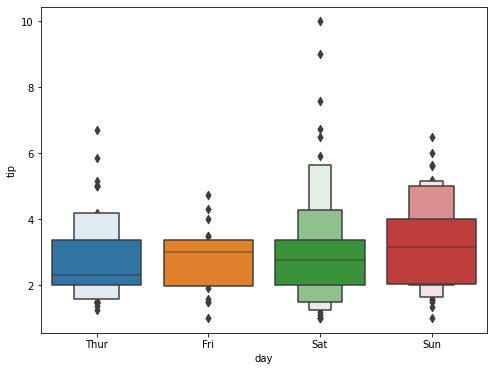

In [105]:
plt.figure(figsize=(8,6))
sns.boxenplot(x = "day", y = "tip", data=tips)
plt.show()

In [106]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [108]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


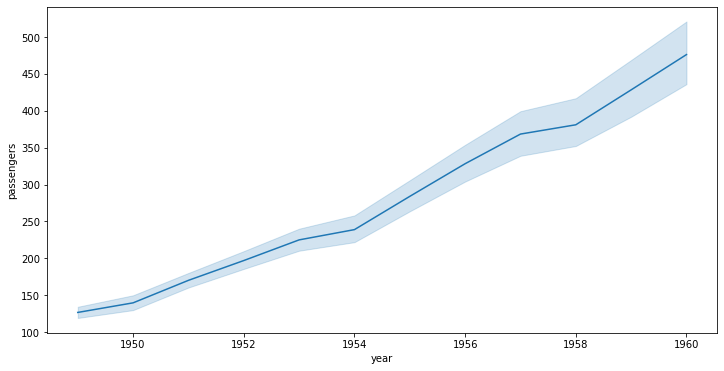

In [112]:
plt.figure(figsize = (12,6))
sns.lineplot(data = flights, x = "year", y = "passengers")
plt.show()

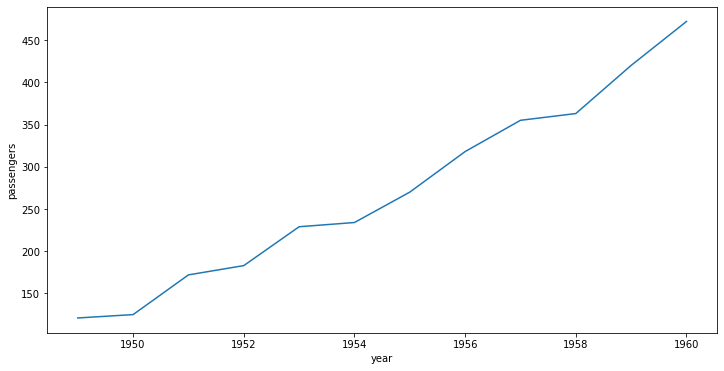

In [115]:
plt.figure(figsize = (12,6))
only_may = flights.query("month == 'May'")
sns.lineplot(data = only_may, x="year", y="passengers")
plt.show()

In [117]:
flights.groupby(["year","month"]).sum()

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[144 rows x 1 columns]

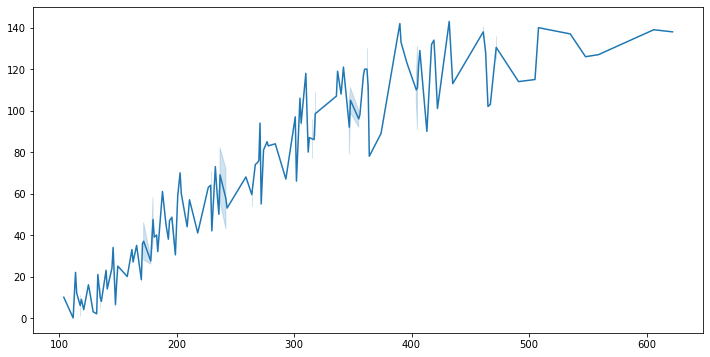

In [129]:
plt.figure(figsize = (12,6))

x = flights.index
y = flights.passengers.values


sns.lineplot(y, x)
plt.show()

In [134]:
flights_wide = flights.pivot("year","month","passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


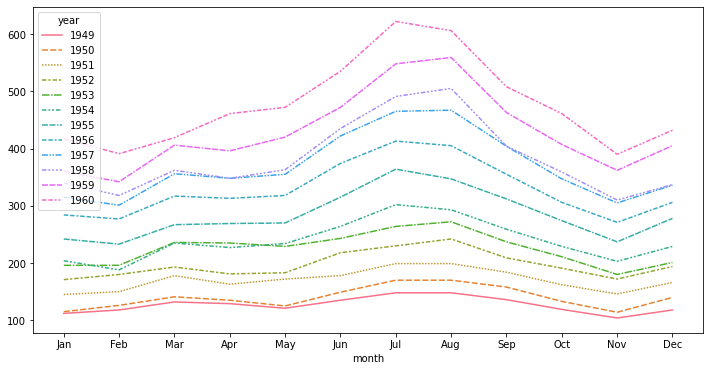

In [139]:
plt.figure(figsize=(12,6))
sns.lineplot(data=flights_wide.transpose())
plt.show()

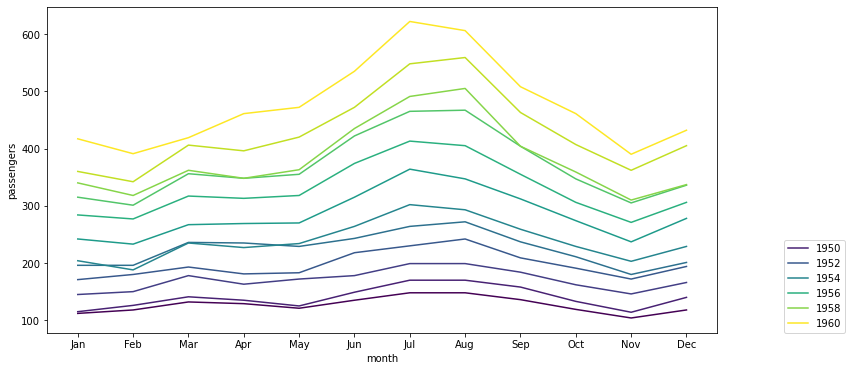

In [145]:
# joseph Forest paylaşımıdır :D
plt.figure(figsize = (12,6))
sns.lineplot(data = flights, x = 'month', y = 'passengers', hue='year', palette = "viridis")  # hue ekledik, palette ekledik
plt.legend(loc=(1.1,.0))
plt.show()

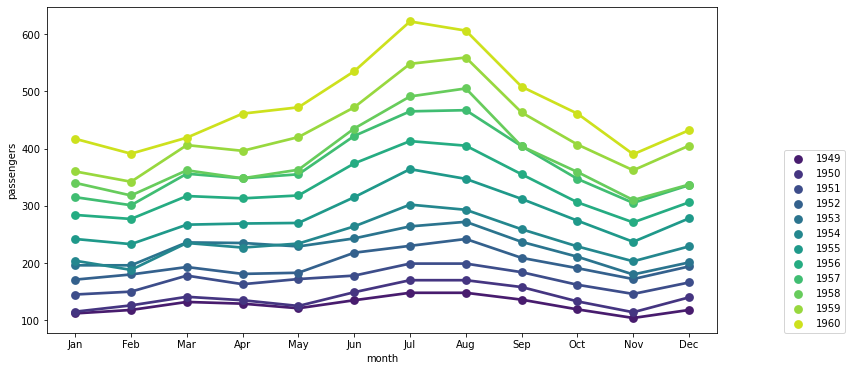

In [146]:
plt.figure(figsize = (12,6))
sns.pointplot(data = flights, x = 'month', y = 'passengers', hue='year', palette = "viridis")  # hue ekledik, palette ekledik
plt.legend(loc=(1.1,.0))
plt.show()